# SISTEMA DE RECOMENDAÇÃO DE FILMES

## A. Introdução
• Detalhar objetivo escolhido para trabalhar neste projeto juntamente com descrição da
base de dados. Pesquise trabalhos na literatura que discutam o tema escolhido. Para
trabalhos acadêmicos, acesse https://scholar.google.com.br/. Guarde as referências
estudadas para citá-las no projeto.


O principal objetivo deste projeto é criar um sistema simples de recomendacao de filmes. Atualmente, é possível encontrar esses sistemas de recomendacao em uma grande parte dos sites que visitamos, como por exemplo uma plataforma de streaming faz para recomendar filmes a um determinado usuário, ou até mesmo em um site de compras, quando é oferecido produtos que você provavelmente irá gostar. A partir disso, guiaremos nosso projeto utilizando técnicas de machine learning, visando alcancar esse objetivo.

Pesquisando um pouco sobre sistemas de recomendacao, vimos que existem diferentes tipos de remcomendadores. De acordo com a empresa de software Datacamp, sistemas de recomendacao podem ser divididos, de maneira geral, em 3 tipos: *recomendadores simples*, *baseados em conteúdo* e *mecanismos de filtragem colaborativa*. 


**Simple recommenders:** offer generalized recommendations to every user, based on movie popularity and/or genre. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. An example could be IMDB Top 250.
**Content-based recommenders:** suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person likes a particular item, he or she will also like an item that is similar to it. And to recommend that, it will make use of the user's past item metadata. A good example could be YouTube, where based on your history, it suggests you new videos that you could potentially watch.
**Collaborative filtering engines:** these systems are widely used, and they try to predict the rating or preference that a user would give an item-based on past ratings and preferences of other users. Collaborative filters do not require item metadata like its content-based counterparts.

O dataset utilizado aqui conta com alguns arquivos que trazem diferentes informacoes sobre cerca de 45000 filmes lancados ate julho de 2017. Tais informacoes incluem incluem elenco, equipe, palavras-chave para enredo, orçamento, receita, link para pôsteres, datas de lançamento, idiomas, empresas de produção, países, contagem de votos no TMDB e média de votos. O dataset foi obtido na plataforma kaggle através desse link. Um resumo do que contem em cada um dos arquivos:

***movies_metadata.csv:*** o principal arquivo de metadados do Movies. Contém informações sobre 45.000 filmes em destaque no conjunto de dados Full MovieLens. Os recursos incluem pôsteres, cenários, orçamento, receita, datas de lançamento, idiomas, países e empresas de produção.

***keywords.csv:*** contém as palavras-chave da trama do filme para os filmes MovieLens. 

***credits.csv:*** Consiste em informações sobre elenco e equipe de todos os nossos filmes. 

***links.csv:*** o arquivo que contém os IDs TMDB e IMDB de todos os filmes apresentados no conjunto de dados Full MovieLens.

***links_small.csv:*** contém os IDs TMDB e IMDB de um pequeno subconjunto de 9.000 filmes do conjunto de dados completo.

***ratings_small.csv:*** o subconjunto de 100.000 classificações de 700 usuários em 9.000 filmes.




## B. Minerando Dados e Características do Dataset

• Se necessário, faça filtro na base de dados tanto de linhas como de colunas em prol do
objetivo traçado anteriormente.
• Descreva as variáveis finais que serão utilizadas a partir deste ponto.
• Faça análise descritiva detalhada das variáveis, norteado pelo objetivo do problema.



Em prol do nosso objetivo e a fim de facilitar o processamento dos dados, vamos utilizar um subconjunto de cerca de 9000 filmes (já pre estipulado a partir dos arquivos links_small e ratings_small).

Desta forma, iremos realizar a leitura dos dados e juntar os dados do dataset principal com os dados sobre a equipe, os ratings e as palavras chave

### Importando as bibliotecas

In [44]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Lendo os arquivos

In [45]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/beatrizcf/2 Semestre - DP/CDADOS/Classificador_Filmes


Primeiramente vamos ler o dataset que contem os metadados dos filmes e em seguida os datasets de ratings crew e keywords

In [46]:
metadados = pd.read_csv('movies_metadata.csv')
metadados.head(3)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [47]:
np.sum(metadados.isnull())

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

Neste df é possível observar que algumas variáveis não convem a nossa análise, por nao trazer nenhuma informacao adicional, como

In [48]:
metadados = metadados.drop(['original_title', 'imdb_id', 'poster_path','adult'], axis=1)
metadados.head()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [49]:
links = pd.read_csv('links_small.csv')
#links = links[links['tmdbId'].notnull()]['tmdbId'].astype('int')
links.head(3)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


In [50]:
np.sum(links.isnull())

movieId     0
imdbId      0
tmdbId     13
dtype: int64

In [51]:
ratings = pd.read_csv('ratings_small.csv')
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


In [52]:
np.sum(ratings.isnull())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [53]:
keywords = pd.read_csv('keywords.csv')
keywords.head(3)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


In [54]:
np.sum(keywords.isnull())

id          0
keywords    0
dtype: int64

In [55]:
credits = pd.read_csv('credits.csv')
credits.head(3)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602


In [56]:
np.sum(credits.isnull())

cast    0
crew    0
id      0
dtype: int64

Para juntar os dados, é necessário ter certeza que a coluna que será mesclada tenha o mesmo tipo. 
- OBS1: No dataset metadados, tivemos que remover as linhas 19730, 29503 e 35587, pois elas nao estava de acordo com o formato do resto da coluna.
- OBS2: No dataset links, foi necessario remover as linhas (13 no total) com valores nulos na coluna tmdbid 

In [57]:
#links['tmdbId'] = links.tmdbId.dropna(inplace=True)


In [58]:
#bool_series = pd.notnull(links['tmdbId']) 
  
# filtering data 
# displayind data only with team = NaN 
#links[bool_series] 

In [59]:
metadados = metadados.drop([19730, 29503, 35587])

In [60]:
metadados['id'] = metadados['id'].astype('int')

In [61]:
#vamos utilizar apenas a coluna tmdb para linkar os outros dfs

links = links[links['tmdbId'].notnull()]['tmdbId'].rename(columns={'tmdbId': 'id'}).astype('int')





In [62]:
keywords['id'] = keywords['id'].astype('int')
#ratings['id'] = ratings['id'].astype('int')
links.head()

0      862
1     8844
2    15602
3    31357
4    11862
dtype: int64

In [98]:
#Vai separar um pequeno conjunto de dados
smd = metadados[metadados['id'].isin(links)]
smd.head(33)

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,en,"Obsessive master thief, Neil McCauley leads a ...",17.9249,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,en,An ugly duckling having undergone a remarkable...,6.67728,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,en,"A mischievous young boy, Tom Sawyer, witnesses...",2.56116,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,en,International action superstar Jean Claude Van...,5.23158,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/75

Acima de 6 é 1 e abaixo é 0



In [99]:
smd['quali'] = 1
filtra0 = smd.vote_average<6.015 # variavel vdd e falso
smd.loc[filtra0,'quali'] = 0
smd.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,quali
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,0


In [100]:
metadados.vote_average.replace(0,np.nan).describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

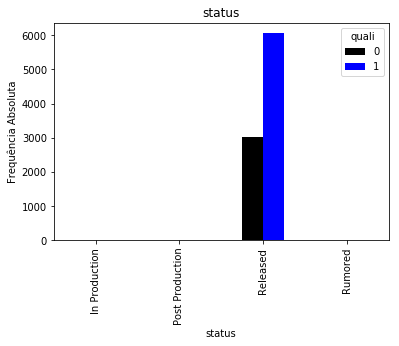

In [111]:
# Função que plota todos os gráficos exploratórios
def exploratoria (data, compara, categorias=[]):
    d0=data[data[compara]==0]
    d1=data[data[compara]==1]
    cros={}
    cros_norm={}
    box={}
    # Plotando para cada categoria
    for c in categorias:
        cros_norm[c] = pd.crosstab(data[c],data[compara],normalize=False)
        cros_norm[c].plot(kind='bar', color=('black', 'b'))
        plt.title(c)
        plt.ylabel('Frequência Absoluta')
        plt.show()
        
# Chamando a função com os dados que possuímos
exploratoria(smd,'quali',categorias = ['status'])

In [102]:
smd['budget'] = smd.budget.astype('int')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
smd.budget.corr(smd.revenue)

0.7553176003000562

Observa-se uma forte correlacao entre as duas variaveis


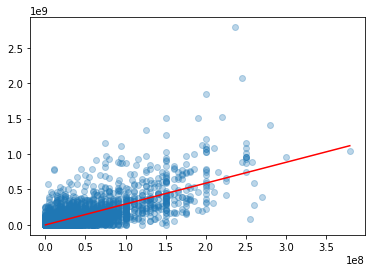

In [110]:
def reta(dados_x, dados_y):
    a = dados_y.cov(dados_x) / dados_x.var() 
    b = dados_y.mean() - a * dados_x.mean()
    plt.plot((dados_x.min(), dados_x.max()), (a * dados_x.min() + b, a * dados_x.max()+ b), color = 'red')

x = smd.budget
y = smd.revenue

plt.scatter(x,y,alpha=0.3)
reta(x,y)
plt.show()


### Informações sobre o dataset

O dataset a ser analisado foi obtido através do TMDB API e conta com um enorme conjunto de dados. Os filmes disponíveis nesse dataset são correespondentes aos filmes listados no *MovieLens Latest Full Dataset*, composta por   26 milhoes de avaliacoes em 45,000 filmes de 27,000 users. A seguir vamos analisar as variáveis disponíveis nesse dataset.

#### Variáveis disponíveis

* **adult:** Indicates if the movie is X-Rated or Adult.
* **belongs_to_collection:** A stringified dictionary that gives information on the movie series the particular film belongs to.
* **budget:** The budget of the movie in dollars.
* **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage:** The Official Homepage of the move.
* **id:** The ID of the move.
* **imdb_id:** The IMDB ID of the movie.
* **original_language:** The language in which the movie was originally shot in.
* **original_title:** The original title of the movie.
* **overview:** A brief blurb of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **poster_path:** The URL of the poster image.
* **production_companies:** A stringified list of production companies involved with the making of the movie.
* **production_countries:** A stringified list of countries where the movie was shot/produced in.
* **release_date:** Theatrical Release Date of the movie.
* **revenue:** The total revenue of the movie in dollars.
* **runtime:** The runtime of the movie in minutes.
* **spoken_languages:** A stringified list of spoken languages in the film.
* **status:** The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline:** The tagline of the movie.
* **title:** The Official Title of the movie.
* **video:** Indicates if there is a video present of the movie with TMDB.
* **vote_average:** The average rating of the movie.
* **vote_count:** The number of votes by users, as counted by TMDB.


Analisando brevemente as variaveis disponiveis, nota-se que algumas delas nao sao ou nao trazem informacoes  relevantes ao nosso projeto. Tais como, *id, imdb_id, original_title, poster_path, video*

In [21]:
dados.adult.value_counts()

NameError: name 'dados' is not defined

## C. Modelos de Predição
• Descreva e justifique sua escolha de modelos de predição. Exemplos de modelos (os
exemplos a seguir são utilizados neste trabalho, mas você pode usar outros que fizerem
mais sentido para o seu problema):
o Modelo de predição pela média (sem uso de variável explicativa);
o Modelo de regressão linear (Multiple Linear Regression);
o Modelo de árvores de regressão (Decision Tree Regression).

## D. Processo e Estatísticas de Validação
• Para os modelos preditivos que foram desenvolvidos no item anterior, é necessário
calcular medidas que informam a performance de cada modelo ajustado. Assim, para
cada modelo preditivo, faça:
o Divida a base de dados na parte treinamento e na parte teste. Use a parte
treinamento para estimar cada modelo preditivo.
o Estude as medidas coeficiente de determinação (R2) e raiz do erro médio
quadrático (RMS) descritas aqui. Calcule essas medidas tanto para a parte dos
dados de treinamento como para a parte dos dados teste.
o Discuta se essas duas medidas se comportam de forma semelhante para as duas
partes de dados. Leia o texto disponível aqui para compreender overfitting e
underfitting e, com isso, refinar senso crítico para discutir sobre as medidas
calculadas.
o Extra: Faça o processo de Validação Cruzada utilizando também 10 ciclos e
calcule a performance média e desvio padrão das duas medidas R2 e RMS tanto
para a parte treinamento como para a parte teste. Discuta com riqueza de
detalhes.

## E. Conclusão
• Faça conclusão final com detalhes levando em consideração todas as interpretações
realizadas no decorrer do projeto.

## F. Referências Bibliográficas
• Todas as pesquisas feitas e estudadas que foram relevantes para o desenvolvimento
devem ser citadas no projeto.

* https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d
* https://medium.com/@bindhubalu/content-based-recommender-system-4db1b3de03e7
* https://www.kaggle.com/rounakbanik/movie-recommender-systems
* https://medium.com/code-heroku/building-a-movie-recommendation-engine-in-python-using-scikit-learn-c7489d7cb145
* http://rnowling.github.io/data/science/2016/10/20/lr-hashing-recsys.html
* https://towardsdatascience.com/what-makes-a-successful-film-predicting-a-films-revenue-and-user-rating-with-machine-learning-e2d1b42365e7

In [ ]:
ratings = pd.read_csv('ratings_small.csv')

In [ ]:
ratings